Intro presentation for Neural Networks and Tensorflow (CHS Data Meetup 2013-03-26)

In [1]:
%run -m ipy_startup
%matplotlib inline

from IPython.display import Image
import plotly as plty
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=True, theme='white', offline_url=True, offline_link_text=None, offline_show_link=False)

import logging
console = logging.StreamHandler()
console.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.addHandler(console)

from traitlets.config.manager import BaseJSONConfigManager
path = "/Users/eczech/.jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
    'theme': 'simple',
    'transition': 'slide',
    'start_slideshow_at': 'selected',
    'width': 1600,
    'height': 900,
    'scroll': True
})

from IPython.display import Image

<center>
<h1>Deep Learning + Tensorflow</h1><br>
<i>CHS Data Analytics</i><br><br>
Eric Czech
</center>

<h1>What is Deep Learning?</h1>

- 50+ yrs of theoretical and empirical results
- Now often recognized as simply application of neural networks with many layers
- Theory on why "deeper" networks do anything more useful still a work in progress
- Expression "Deep Learning" used at least as far back as 1993

<h1>History of Deep Learning</h1>

- 1943: McCulloch and Pitts credited with first ANN model
- 1957: Vladimir Arnold showed that single-layer NN can be used to solve Hilbert's 13th problem 
- 1958: Frank Rosenblatt created the (much overly hyped) Perceptron algorithm 
- 1962: Backpropogation algorithms derived 
- 1969: Minsky and Papert showed that Perceptron could not solve XOR problem
- 1971: First reasonable results from many-layer networks published

... <strong>corporate and government research stops caring for a while until about mid 80s</strong> ...

- 1989: Universal approximation of NNs shown (Cybenko, Funahashi, Hornik, Stinchcombe, White)
- 1986: First use of the word "Deep Learning" seen in publications
- 1992: Unsupervised pre-training applied to make training deep networks possible
- 1992: "Pooling" layers for ANNs proposed
- 2003: First published use cases for deep, convolutional neural networks in computer vision
- 2004: Fast GPU based implementations of ANNs used

... <strong>deep learning sort of "begins"</strong> ...

- 2005+: CNNs and LSTMs (both deep networks) start crushing old benchmarks
- 2006: Yoshua Bengio, Yann LeCun, and Geoff Hinton begin commercialization of deep networks in North America
    - Sometimes called "Deep Learning Conspiracy"
    - They often cite each other and are just as often given credit as creators of Deep Learning
    - Jürgen Schmidhuber - the forgotten creator 
- 2006+: Deep Learning applied by companies to tons of things (Genomics, Speech Recognition, Vision, etc)
- 2012: Hinton's team kills on Kaggle Merck Challenge
- 2015: "Deep Learning" paper published in Nature (Bengio, Hinton, LeCun)
    - Schmidhuber not happy: http://people.idsia.ch/~juergen/deep-learning-conspiracy.html

- Other recent developments to improve deep network training: 
    - Batch Normalization
    - Advanced Optimizers (improving upon vanilla gradient descent)
    - Dropout
    - Empirical results favoring recified linear activation functions

<h1>Agenda</h1>

- <strong>Theory</strong>
    - Optimization and Gradient Descent
    - Single layer networks can learn anything
    - Multi-Layer networks can learn anything ... but usually with less parameters
    - Asymptotic limits of single vs multi layer networks
        - Depth provides exponential gains
<br>
- <strong>Practice</strong>
    - Python / Tensorflow Setup and Installation
    - Tensorflow Mechanics
    - Applications of Tensorflow
    - Why Tensorflow matters for companies without petabyte-sized datasets

<h1>Optimization</h1>

<h3>How else can we fit a linear regression problem (rather than OLS)?<h3>

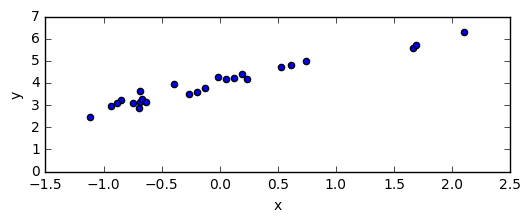

In [2]:
# Generate a random linear regression problem
np.random.seed(1)
n = 25
b0, b1, e = 4, 1, .2 * np.random.randn(n)
x = np.random.randn(n)
y = b0 + b1*x + e

# Plot the single variable (x) and response (y)
plt.figure(figsize=(6,2))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 7)
print()

<h3>Need to minimize RSS</h3>

In [3]:
Image(url='https://i.stack.imgur.com/ddJFC.png', width=500)

In [4]:
Image(url='http://ww2.tnstate.edu/ganter/BIO-311-Ch12-Eq5a.gif', width=500)

<h1>RSS Surface</h1>

In [5]:
Image(url='https://i.stack.imgur.com/bmg5Z.png', width=500)

<h3>Gradient Descent</h3>

In [6]:
from IPython.display import Image
#Image(url='https://www.cs.toronto.edu/~frossard/post/linear_regression/sgd.gif')   
Image(url='https://alykhantejani.github.io/images/gradient_descent_line_graph.gif')

<h1>Single-Layer Neural Networks</h1>

<h1>Linear Regression</h1>

Linear regression is a type of neural network:

In [7]:
img_width=700

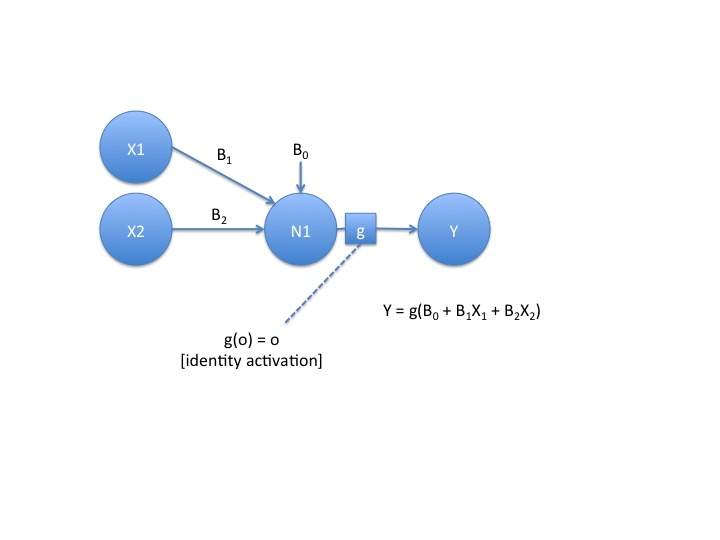

In [8]:
Image('media/network_architectures/Slide2.jpg', width=img_width)

<h1>Decision Function (linear regression)<h1>

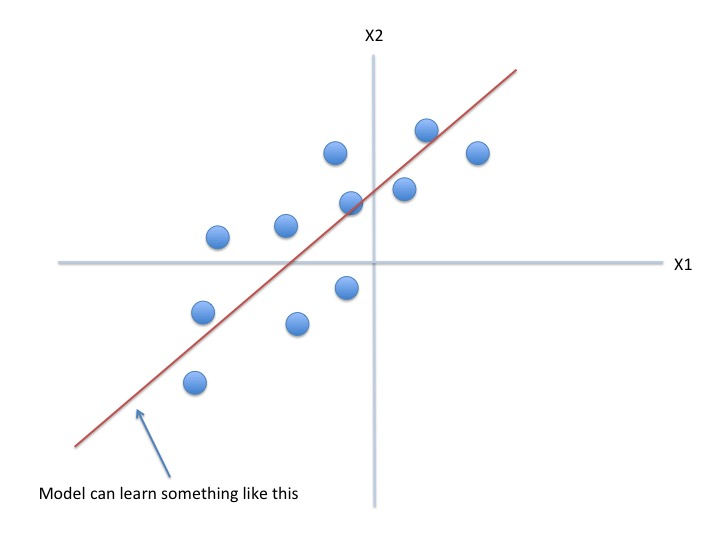

In [9]:
Image('media/network_architectures/Slide3.jpg', width=img_width)

<h1>Logistic Regression</h1>

Logistic regression can also be expressed this way, just need to change the activation function:

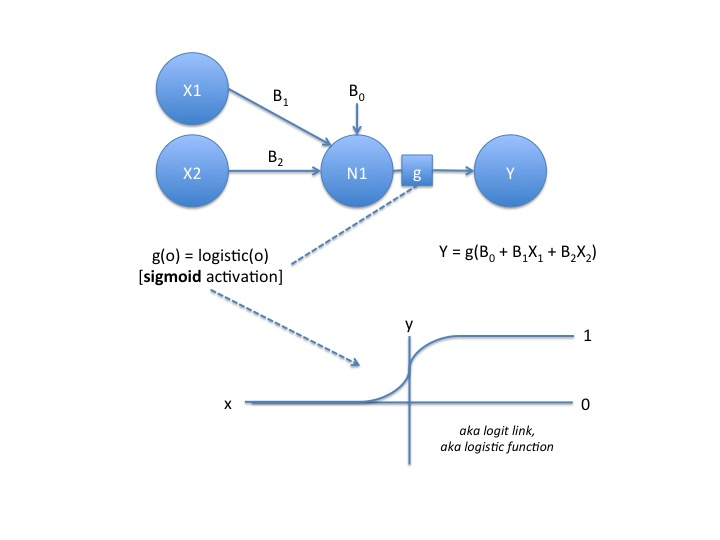

In [10]:
Image('media/network_architectures/Slide4.jpg', width=img_width)

<h1>Decision Function (logistic regression)<h1>

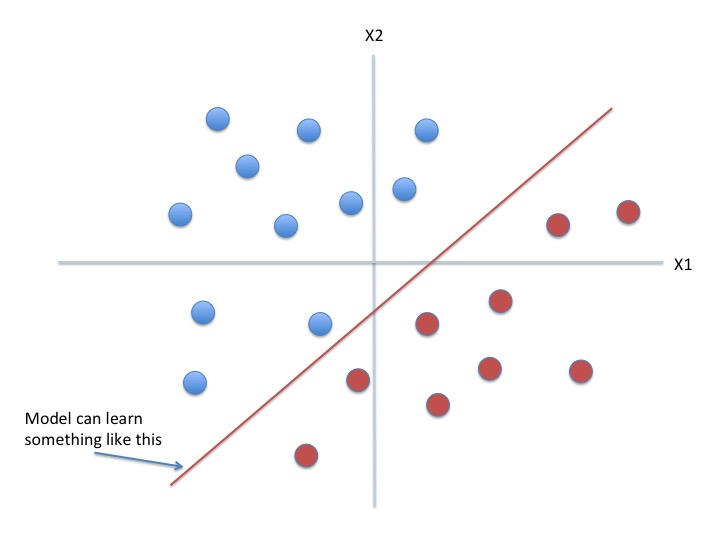

In [11]:
Image('media/network_architectures/Slide5.jpg', width=img_width)

<h1>"Double" Logistic Regression</h1>

Adding neurons is like adding extra models of the original form, in this case two logistic regressions:

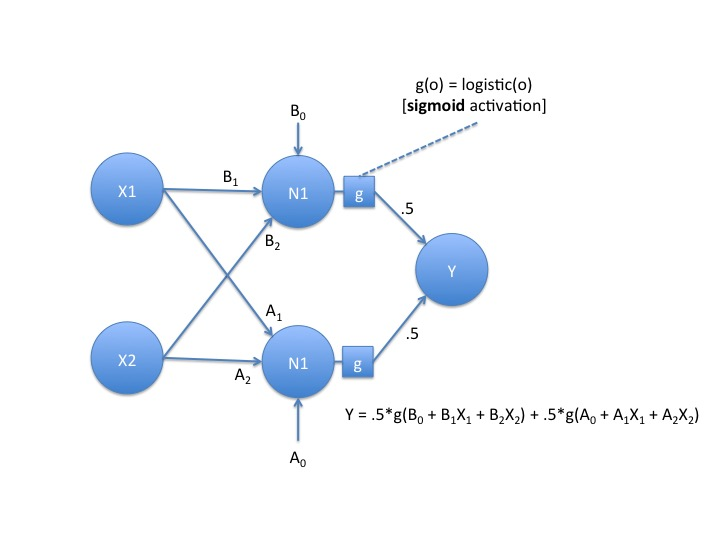

In [12]:
Image('media/network_architectures/Slide6.jpg', width=img_width)

<h1>Decision Function (double logistic regression)<h1>

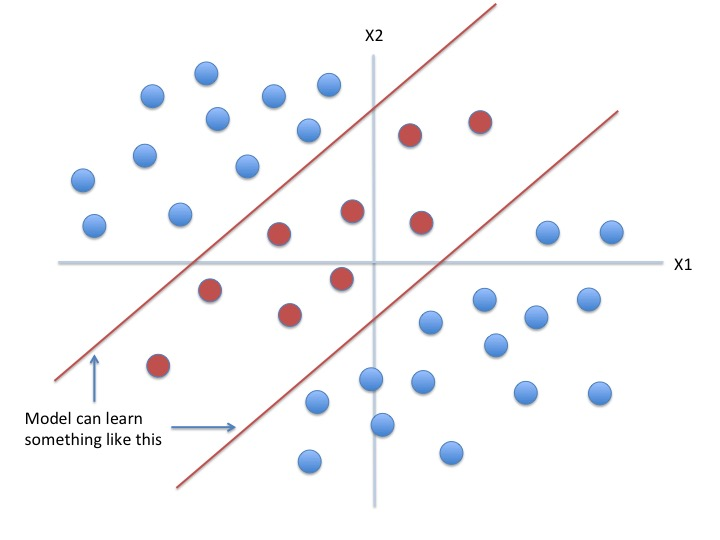

In [13]:
Image('media/network_architectures/Slide7.jpg', width=img_width)

<h1>Activation Functions</h1>

<h1>Sigmoid Activation</h1>

Parameterization of one single sigmoid neuron can do relatively complex things: [Sigmoid -> Step Function](http://neuralnetworksanddeeplearning.com/movies/step_3d.mp4)

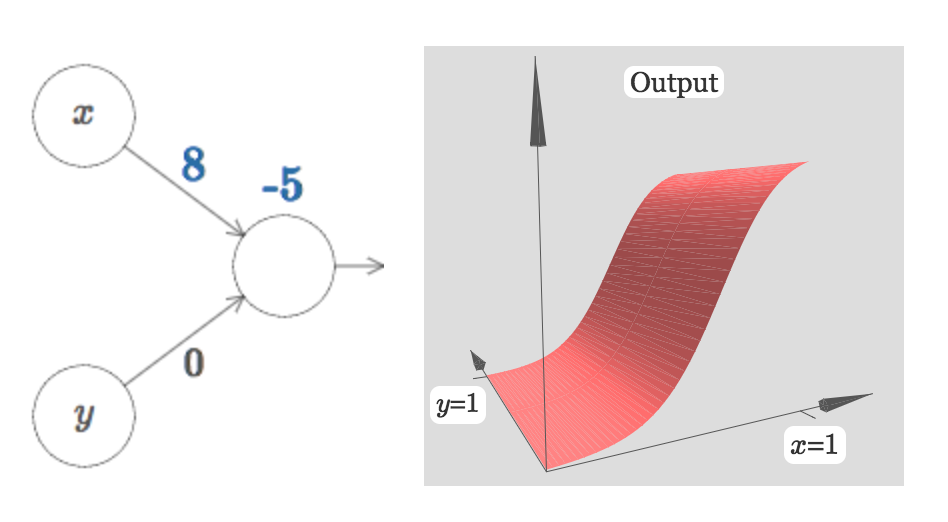

In [14]:
Image('media/nn1.png', width=img_width)

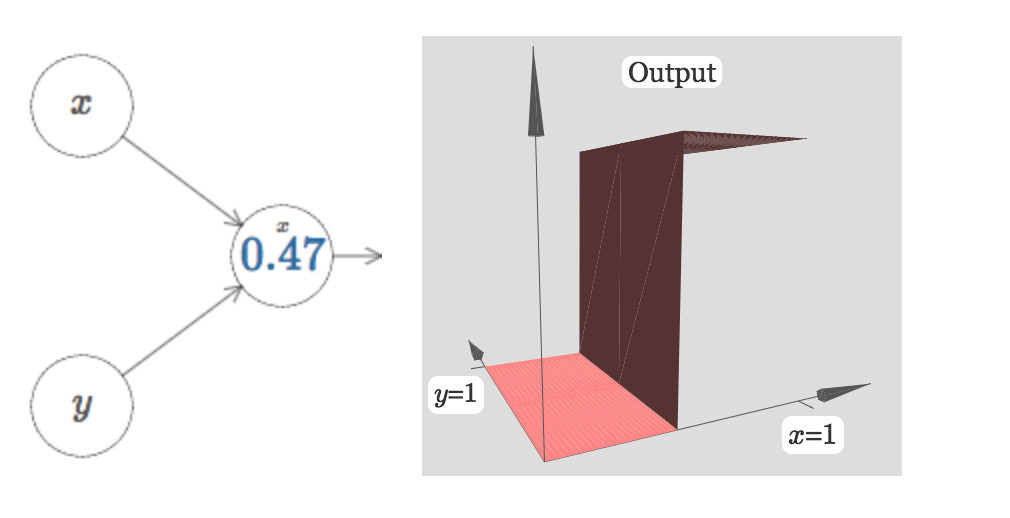

In [15]:
Image('media/nn2.png', width=img_width)

<h1>Adding More Neurons</h1>

More neurons means more "folds":

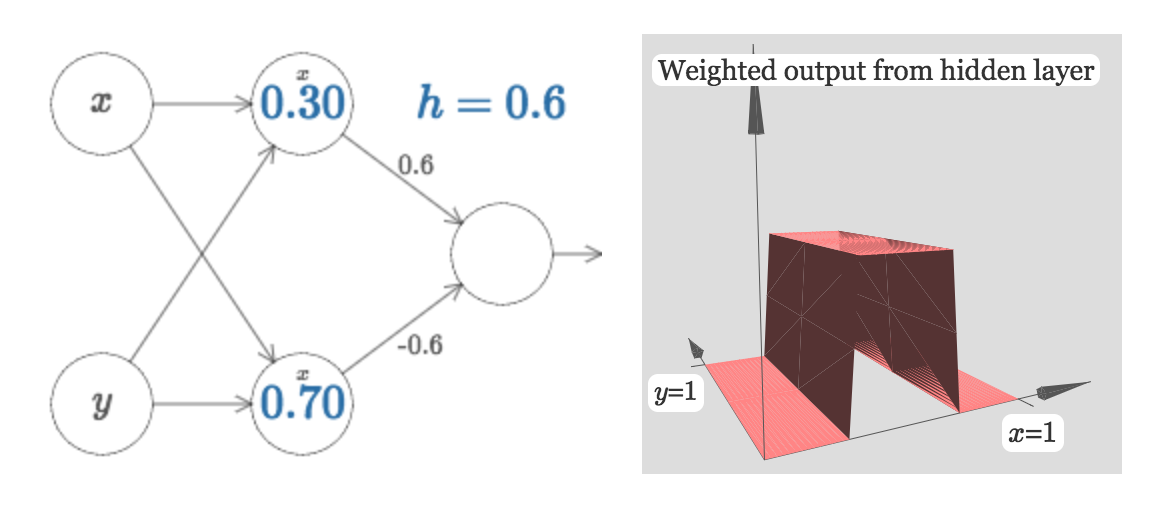

In [16]:
Image('media/nn3.png', width=img_width)

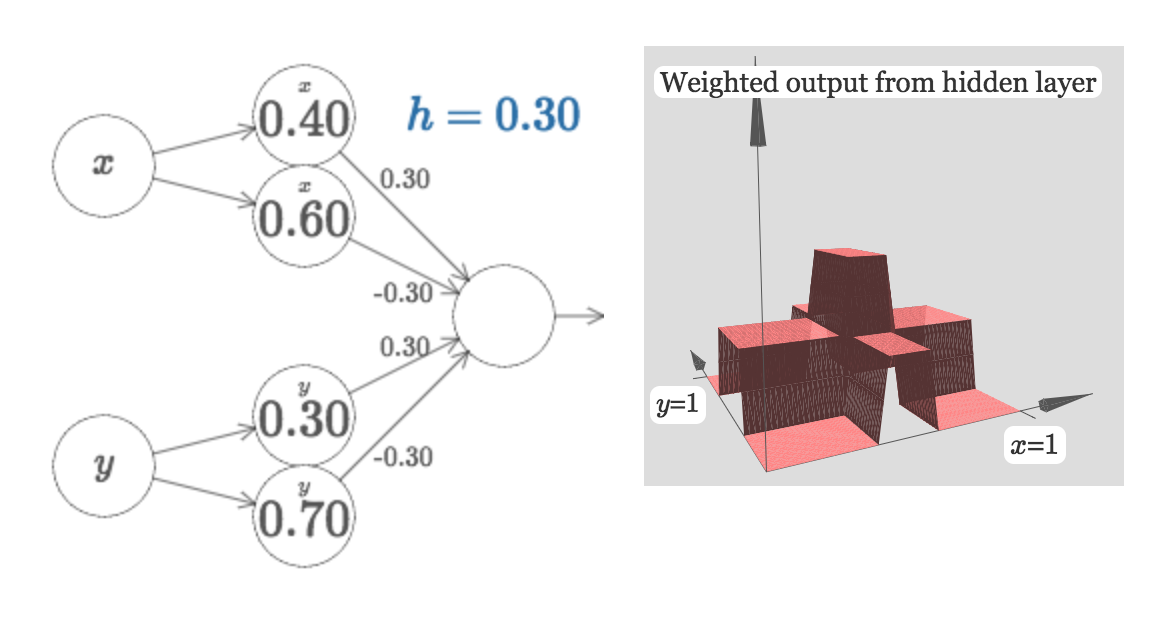

In [17]:
Image('media/nn4.png', width=img_width)

<h1>Arbitrary Function Approximation</h1>

This type of reasoning was how ANNs have been shown to approximate any function

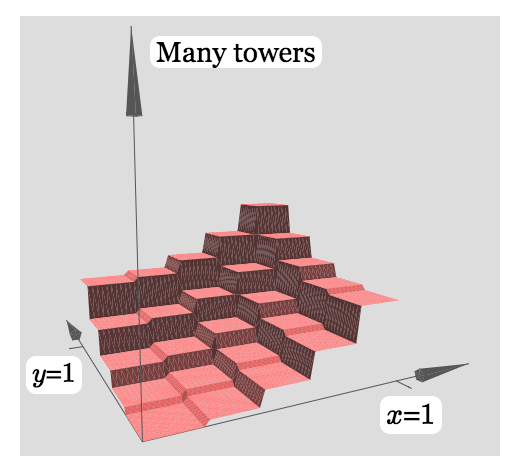

In [18]:
Image('media/nn5.png', width=500)

Takeaway: Through many "towers" like this, an ANN can approximate any 3D function with just 2 inputs.

<h1>Rectified Linear Activation</h1>

These are much more common in deeper networks than sigmoid activation:

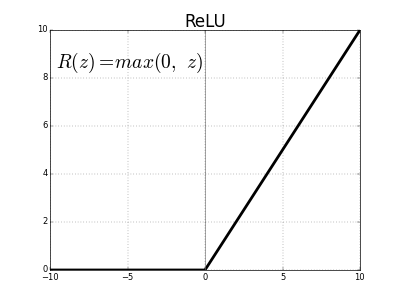

In [19]:
Image('media/relu.png', width=500)

Other activation functions worth mentioning: Leaky ReLU, softplus, tanh

<h1>Multi-Layer Neural Networks</h1>

<h3>Multi-Layer Neural Networks</h3>

If single-layer networks can approximate some output arbitrarily well, why does more layers lead to better performing models on many common tasks?

At the moment, nobody has a "complete" answer to this question though some theory on this is out there.

<h3>Multi-Layer Neural Network Effectiveness</h3>

Here are at few decent reasons though:

1. **Distributed Representation** - Similarly, the use of a "distributed representation" through separating planes and activations also increases the number of representable input regions exponentially
2. **Feature Inference** - Multiple layers act as "composed" functions, which matches well with the nature of many problems like, for example, facial recognition
    - Edge function -> [Ear Function, Eye Function, Nose Function] -> Face Function
    - This is difficult if done all in one level (unless mid level features are generated manually)
3. **Input Region Partitioning** - Mathematically, the number of input region splits possible increases exponentially with layers and only polynomially with number of neurons in one layer

<h1>Distributed Representation</h1>

In [20]:
Image(url='media/partition_3neuron.png', width=800)

<h1>Feature Inference</h1>

In [21]:
Image(url='http://rinuboney.github.io/img/AI_system_parts.png')

<h1>Input Region Partitioning</h1>

aka Decision Surfaces

<h3>Typical ML Models</h3>

Different common models allow for a variety of ways to divide the input region into spaces where the predicted value will differ:

In [22]:
Image(url='http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png')

<h3>Single Layer Network Input Partitioning</h3>

Every neuron added into a single-layer network with 2 inputs gives you one line with which to split the input space.  

Consider a 3-Neuron, 1-Layer network:

In [23]:
Image(url='media/231layernn.png', width=500)

<h3>How 2-D inputs get divided into half-spaces</h3>

3 neurons mean 3 separating lines within input space:

In [24]:
Image(url='media/partition_3neuron.png', width=500)

In [4]:

import tensorflow as tf

#activation = lambda x: tf.reduce_max(x, axis=0)
activation = lambda x: tf.abs(x)

def tf_print(t, transform=None):
    def log_value(x):
        logger.info('{} - {}'.format(t.name, x if transform is None else transform(x)))
        return x
    log_op = tf.py_func(log_value, [t], [t.dtype], name=t.name.split(':')[0])[0]
    with tf.control_dependencies([log_op]):
        r = tf.identity(t)
    return r


sess_config = tf.ConfigProto(device_count = {'GPU': 0}, log_device_placement=True)
tf.logging.set_verbosity(tf.logging.DEBUG)


def get_network_response_surface(X, network_fn):
    with tf.Session(config=sess_config) as sess:
        X_, y = network_fn()

        with tf.device('/cpu:0'):
            yv = sess.run(y, feed_dict={X_: X})
        return yv
    
def plot_network_response_surface(v, y):
    trace = go.Surface(x=v, y=v, z=y.reshape((len(v), -1), order='C'))
    layout = go.Layout(
        scene=go.Scene(
            xaxis=go.XAxis(title='X1'),
            yaxis=go.YAxis(title='X2'),
            zaxis=go.ZAxis(title='Y')
        )
    )
    fig = go.Figure(data=[trace], layout=layout)
    plty.offline.iplot(fig)
    
v = np.linspace(-15, 15, num=21)
X = np.hstack([np.expand_dims(x.ravel(), 1) for x in np.meshgrid(v, v)])
X = X.astype(np.float64)

In [5]:
def get_one_layer_network(b, w1, w2):
    # Create 2-D network inputs
    X = tf.placeholder(tf.float64, shape=(None, 2))
    
    # Multiply weights by inputs
    nw = len(w1[0])
    b = tf.constant(b, dtype=tf.float64)
    w1 = tf.constant(w1, shape=[2, nw], dtype=tf.float64)
    
    # Apply activation function
    z = activation(b + tf.matmul(X, w1))
    
    # Multiply activation function by output weights and return prediction from network
    w2 = tf.constant(w2, shape=[nw], dtype=tf.float64)
    y = tf.reduce_sum(tf.multiply(z, w2), axis=1)
    
    return X, y

activation = lambda x: tf.abs(x)
network_fn = lambda: get_one_layer_network(b, w1, w2)

<h1>1 Layer - 3 Neuron Input Region Partitions</h1>

In [6]:
b = [-5, -5, -5]
w1 = [[1, -1, 0], [1, 1, -3]]
w2 = [.1, .1, .1]

y = get_network_response_surface(X, network_fn)
plot_network_response_surface(v, y)

<h1>2-Layer Example</h1>

What about this network (same number of neurons, one extra layer)?

In [28]:
Image(url='media/2211layernn.png', width=500)

First, to understand what this does it's easier to look at a 1 layer, 2 neuron network ..

<h1>2 Neurons, 1 Layer</h1>

In [29]:
Image(url='media/221layernn.png', width=500)

In [7]:
activation = lambda x: tf.abs(x)

def get_one_layer_network(b, w1, w2):
    # Create 2-D network inputs
    X = tf.placeholder(tf.float64, shape=(None, 2))
    
    # Multiply weights by inputs
    nw = len(w1[0])
    b = tf.constant(b, dtype=tf.float64)
    w1 = tf.constant(w1, shape=[2, nw], dtype=tf.float64)
    
    # Apply activation function
    z = activation(b + tf.matmul(X, w1))
    
    # Multiply activation function by output weights and return prediction from network
    w2 = tf.constant(w2, shape=[nw], dtype=tf.float64)
    y = tf.reduce_sum(tf.multiply(z, w2), axis=1)
    
    return X, y

<h1>Input Region Partitions</h1>

In [8]:
b = [0, 0]
w1 = [[1, 0], [0, 1]]
w2 = [.1, .1]

network_fn = lambda: get_one_layer_network(b, w1, w2)
y = get_network_response_surface(X, network_fn)
plot_network_response_surface(v, y)

<h1>221 Network</h1>

Ok so back to the original question, what does adding a single neuron in a second layer do?

The 221 network we're talking about:

In [32]:
Image(url='media/2211layernn.png', width=500)

In [9]:
activation = lambda x: tf.abs(x)

def get_two_layer_network(b1, b2, w1, w2, w3):
    X = tf.placeholder(tf.float64, shape=(None, 2))
    
    b1 = tf.constant(b1, dtype=tf.float64)
    w1 = tf.constant(w1, shape=[2, 2], dtype=tf.float64)
    z1 = activation(b1 + tf.matmul(X, w1))
    
    b2 = tf.constant(b2, dtype=tf.float64)
    w2 = tf.constant(w2, shape=[2, 1], dtype=tf.float64)
    z2 = activation(b2 + tf.matmul(z1, w2))

    y = tf.reduce_sum(tf.multiply(z2, w3), axis=1)
    return X, y

<h1>Input Region Partitions</h1>

In [10]:
b1 = [0, 0]
b2 = [-15]
w1 = [[1, 0], [0, 1]]
w2 = [1, 1]
w3 = [1]

network_fn = lambda: get_two_layer_network(b1, b2, w1, w2, w3)
y = get_network_response_surface(X, network_fn)
plot_network_response_surface(v, y)

<h3>Theortical Results</h3>

Carrying this out to larger numbers of neurons lowers, it has been shown [1] that bounds exist for the number of possible regions per parameter used in a network.

Given:

$l$ = number of layers<br>
$d$ = number of inputs<br>
$k$ = number of neurons ($\geq d$)
    
Multi-Layer NN **response regions per parameter** = $ \Omega(\lfloor\frac{k}{d}\rfloor^{(l - 1)} \frac{k^{(d-2)}}{l})$
<br><br>
Single-Layer NN **response regions per parameter** = $ O(l^{(d - 1)}k^{(d - 1)}) $
    
[1] - [On the number of response regions of deep feed forward networks with piece-wise linear activations](https://arxiv.org/pdf/1312.6098.pdf)

<h1>Real-Life Networks</h1>

Here are some examples of real-life networks, how much data they require, and what it takes to train them...

<h1>[Galaxy Zoo Challenge](http://blog.kaggle.com/2014/04/18/winning-the-galaxy-challenge-with-convnets/) (Kaggle)</h1>

- Trained on 61,578 424x424 training images
- 42 million parameters
- 4 convolutional + pooling layers, 3 dense layers
- Trained using hexacore CPU, 32GB RAM and two NVIDIA GeForce GTX 680 GPUs each
- 1.5 million gradient steps
- Training time: 67 hours

<h1>[AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) (2012)</h1>
- From Hinton Grad Student paper
- 2012 marked the first year where a CNN was used to win "top5" category in ImageNet competition 
- Trained on 1.3 million images to identity 1000 different classes
- 60 million parameters and 650,000 neurons
- 5 convolutional layers, 3 dense layers
- Trained on two GTX 580 3G GPUs for five to six days
- ~850k gradient steps (1.2M imsages / 128 batch size * 90 cycles through data)

<h1>[VGG19](https://arxiv.org/pdf/1409.1556.pdf) (2014)</h1>
- "Visual Geometry Group" from Oxford
- Won in 2014 ImageNet (aka ILSVRC) competition
- Also trained on 1.3 million images to identity 1000 different classes
- ~135 million parameters
- ~10 convolutional layers, 3 dense layers
- Trained on 4 Titan Black GPUs for 2-3 weeks

<h1>[Shakespeare Regurgitating RNNs](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)</h1>
- Full works of Shakespeare = 4.4MB (884,647 words)
- 3 layers, 512 neurons in each
- A couple hours of training
- [Generated Results](https://docs.google.com/presentation/d/e/2PACX-1vRouwj_3cYsmLrNNI3Uq5gv5-hYp_QFdeoan2GlxKgIZRSejozruAbVV0IMXBoPsINB7Jw92vJo2EAM/pub?slide=id.g139650d17f_0_1096)


<h1>ILSVRC Challenge</h1>

well one of them at least:

In [35]:
Image(url='http://www.image-net.org/challenges/LSVRC/2014/ILSVRC2012_val_00042692.png')

<h1>Network Architectures Getting Bonkers</h1>

Accuracy vs Network Complexity in ImageNet LSVRC competitions (blob size is #Parameters):

In [36]:
Image(url='media/network_arch_over_time.svg', width=700)

Source: [Site](https://culurciello.github.io/tech/2016/06/04/nets.html) ([Paper](https://arxiv.org/pdf/1605.07678.pdf))

<h1>Deep Learning and Small Data</h1>

When does deep learning apply to a problem?

In [37]:
Image(url='media/deep_learning_matrix.jpg', width=500)

<h1>A Small Data Example</h1>

[Determining Quality of Product Descriptions](https://quid.com/feed/how-quid-uses-deep-learning-with-small-data)

This was a small but interesting study on applying some ideas from deep learning to normal business problems:

- Based on less than 800 descriptive statements (half good, half bad)
- Used 1D convolutional layer and 2 dense layers
- Compared CNN (deep learning network) to:
    - A very simple linear model
    - A model with:
        - **"much greater representational capacity"** - probably GBRT or XGBoost
        - **"hand-crafted features"** - word embeddings and probably looking for things like how many times the word "innovative" is used

<h1>Results</h1>

In [38]:
Image(url='media/quid_results.png')

<h1>What to do if != [Google, NSA, Amazon]?</h1>

Possibly the most interesting applications of deep learning for small businesses lie in transfer learning.

Another lies in the exhaust of the tools for building models that actually match your problem ...

<h1>Resources</h1>


Breakfast Reading:

- [Neural Networks, Manifolds, and Topology](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)
- [A visual proof that neural nets can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html)
- [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

Best Book (free too):

- [Deep Learning (2015 - Bengio)](https://github.com/HFTrader/DeepLearningBook/raw/master/DeepLearningBook.pdf)

The prettiest presentations ever:

- [Tensorflow and Deep Learning w/o a PhD (pt 1)](https://docs.google.com/presentation/d/1TVixw6ItiZ8igjp6U17tcgoFrLSaHWQmMOwjlgQY9co/pub?slide=id.p)
- [Tensorflow and Deep Learning w/o a PhD (pt 2)](https://docs.google.com/presentation/d/e/2PACX-1vRouwj_3cYsmLrNNI3Uq5gv5-hYp_QFdeoan2GlxKgIZRSejozruAbVV0IMXBoPsINB7Jw92vJo2EAM/pub?slide=id.p)
- Homepage for the above: https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd



- Data vs Deep Learning Matrix: http://www.kdnuggets.com/wp-content/uploads/deep-learning-small-big-data.jpg


- Small data examples:
    - https://quid.com/feed/how-quid-uses-deep-learning-with-small-data
        - Uses 1-D convolutions of different sizes (1-4)
        - 2/3 for training, 1/3 for evaluation
        - 2 fully connected layers
        - Accuracy: https://d15wj1jyee7mbq.cloudfront.net/results.png?mtime=20161117180824
        - https://news.ycombinator.com/item?id=12990488
            - "300-400 examples of each" meaning 300-400 examples of good and bad quality
            - randomly picked a few descriptions from the 50k possible companies    
    - Transfer Learning by training on large amounts of related data


- Stuff Left out
    - Progress in unsupervised learning
    - Progress in transfer learning
    
    
Character-Level Language Models

    - RNNs can reconstruct paragraphs one-character at a time
    - 
    
PANDARUS:
Alas, I think he shall be come approached and the day
When little srain would be attain'd into being never fed,
And who is but a chain and subjects of his death,
I should not sleep.

Second Senator:
They are away this miseries, produced upon my soul,
Breaking and strongly should be buried, when I perish
The earth and thoughts of many states.


Datasets

- ImageNet
    -  over 15 million labeled high-resolution images in over 22,000 categories
- Galaxy Zoo
    
- 

Network Architectures:

https://culurciello.github.io/tech/2016/06/04/nets.html

RNNs: http://karpathy.github.io/2015/05/21/rnn-effectiveness/




Shakespeare example:

https://docs.google.com/presentation/d/e/2PACX-1vRouwj_3cYsmLrNNI3Uq5gv5-hYp_QFdeoan2GlxKgIZRSejozruAbVV0IMXBoPsINB7Jw92vJo2EAM/pub?slide=id.g139650d17f_0_1096

Understanding Relu vs Sigmoid, Dropout, and Learning Rate Decay:

https://docs.google.com/presentation/d/1TVixw6ItiZ8igjp6U17tcgoFrLSaHWQmMOwjlgQY9co/pub?slide=id.p

Understanding batch normalization, convolutions and RNNs and examples (character learning, word learning, image captioning, writing python/latex)

https://docs.google.com/presentation/d/e/2PACX-1vRouwj_3cYsmLrNNI3Uq5gv5-hYp_QFdeoan2GlxKgIZRSejozruAbVV0IMXBoPsINB7Jw92vJo2EAM/pub?slide=id.p